# Importing Modules and Reading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 23.1 MB/s 


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/miniproyecto/Copia de Womens Clothing E-Commerce Reviews.csv')
df = df1[['Review Text','Rating','Class Name','Age']]
#df1.info()
#df1.describe()
df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [21]:
df['n_words']=[len(x.split(' ')) for x in df1['Review Text']]

In [22]:
df['n_words'].describe()

count    23486.000000
mean        58.084391
std         30.080991
min          1.000000
25%         34.000000
50%         57.000000
75%         87.000000
max        115.000000
Name: n_words, dtype: float64

In [ ]:
df1['Rating'].describe([.25, .50,.75,.90,])

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
90%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [15]:
df1['Review Text']=df1['Review Text'].astype(str)

In [16]:
%%time
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
df1['Cleaned Reviews'] = df1['Review Text'].apply(clean)
df1.head()

CPU times: user 464 ms, sys: 1.28 ms, total: 465 ms
Wall time: 472 ms


In [17]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [19]:
df1['POS tagged'] = df1['Cleaned Reviews'].apply(token_stop_pos)
df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned Reviews,POS tagged
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comfor...,"[(Absolutely, r), (wonderful, a), (silky, n), ..."
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress it s sooo pretty i happened to...,"[(Love, v), (dress, n), (sooo, a), (pretty, r)..."
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[(high, a), (hopes, n), (dress, n), (really, r..."
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit it s fun flirty...,"[(love, v), (love, r), (love, v), (jumpsuit, n..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[(shirt, n), (flattering, a), (due, a), (adjus..."


In [20]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [23]:
df1['Lemma'] = df1['POS tagged'].apply(lemmatize)
df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned Reviews,POS tagged,Lemma
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comfor...,"[(Absolutely, r), (wonderful, a), (silky, n), ...",Absolutely wonderful silky sexy comfortable
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress it s sooo pretty i happened to...,"[(Love, v), (dress, n), (sooo, a), (pretty, r)...",Love dress sooo pretty happen find store gla...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[(high, a), (hopes, n), (dress, n), (really, r...",high hope dress really want work initially o...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit it s fun flirty...,"[(love, v), (love, r), (love, v), (jumpsuit, n...",love love love jumpsuit fun flirty fabulous ...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[(shirt, n), (flattering, a), (due, a), (adjus...",shirt flattering due adjustable front tie pe...


In [24]:
df1[['Review Text', 'Lemma']].head()

,Review Text,Lemma
0,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,Love dress sooo pretty happen find store gla...
2,I had such high hopes for this dress and reall...,high hope dress really want work initially o...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ...
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie pe...


# Using TextBlob

In [25]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
fin_data = pd.DataFrame(df1[['Review Text', 'Lemma']])

In [27]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Review Text,Lemma,Polarity,Analysis
0,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful silky sexy comfortable,0.633333,Positive
1,Love this dress! it's sooo pretty. i happene...,Love dress sooo pretty happen find store gla...,0.318750,Positive
2,I had such high hopes for this dress and reall...,high hope dress really want work initially o...,0.082300,Positive
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ...,0.500000,Positive
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie pe...,0.458333,Positive


In [28]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    21206
Negative     1294
Neutral       986
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd045f54c90>,
 [Text(-1.0492372691669218, 0.3303046366479594, 'Positive'),
  Text(0.9966862624137177, -0.465420771255188, 'Negative'),
  Text(1.3382751010715226, -0.1775380349446471, 'Neutral')],
 [Text(-0.5723112377274119, 0.18016616544434147, '90.3%'),
  Text(0.5436470522256641, -0.2538658752301025, '5.5%'),
  Text(0.8426176562302177, -0.11178320718737039, '4.2%')])

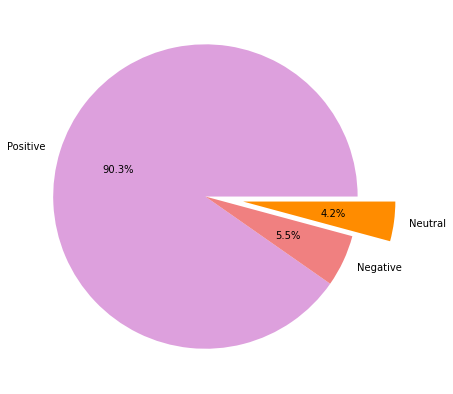

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False, colors=['plum', 'lightcoral', 'darkorange'])

# Analisis de sentimiento usando VADER

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [31]:
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [32]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [33]:
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Review Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful silky sexy comfortable,0.633333,Positive,0.8991,Positive
1,Love this dress! it's sooo pretty. i happene...,Love dress sooo pretty happen find store gla...,0.318750,Positive,0.9710,Positive
2,I had such high hopes for this dress and reall...,high hope dress really want work initially o...,0.082300,Positive,0.9184,Positive
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ...,0.500000,Positive,0.9437,Positive
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie pe...,0.458333,Positive,0.9062,Positive


In [34]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    20516
Neutral      2825
Negative      145
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd0460c85d0>,
 [Text(-1.1065399662104258, 0.4642944143310683, 'Positive'),
  Text(1.0058831326692608, -0.44519560129394203, 'Neutral'),
  Text(1.0997931006443533, -0.021333911387261085, 'Negative')],
 [Text(-0.6454816469560818, 0.2708384083597898, '87.4%'),
  Text(0.5486635269105058, -0.24283396434215018, '12.0%'),
  Text(0.5998871458060109, -0.011636678938506046, '0.6%')])

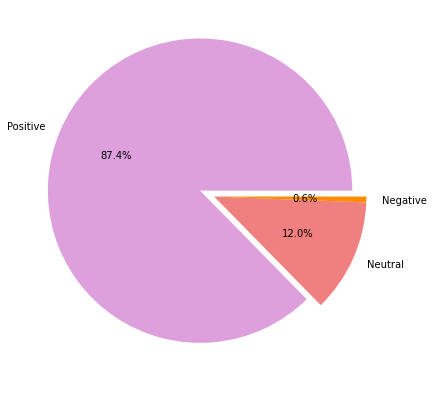

In [35]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False, colors=['plum', 'lightcoral', 'darkorange'])
# plt.legend()

# Analisis using SentiWordNet

In [36]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [37]:
fin_data['SWN analysis'] = df1['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

,Review Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful silky sexy comfortable,0.633333,Positive,0.8991,Positive,Positive
1,Love this dress! it's sooo pretty. i happene...,Love dress sooo pretty happen find store gla...,0.318750,Positive,0.9710,Positive,Positive
2,I had such high hopes for this dress and reall...,high hope dress really want work initially o...,0.082300,Positive,0.9184,Positive,Negative
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ...,0.500000,Positive,0.9437,Positive,Positive
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie pe...,0.458333,Positive,0.9062,Positive,Positive


In [38]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    15841
Negative     5927
Neutral      1717
0               1
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd03dcaf7d0>,
 [Text(-0.625348279648418, 1.0241774890812452, 'Positive'),
  Text(0.34430984061721653, -1.0447251952806285, 'Negative'),
  Text(1.0710478118898275, -0.2507121549626445, 'Neutral'),
  Text(1.099999990171261, -0.00014704837957503727, '0')],
 [Text(-0.3647864964615771, 0.5974368686307263, '67.4%'),
  Text(0.18780536760939082, -0.5698501065167063, '25.2%'),
  Text(0.5842078973944512, -0.1367520845250788, '7.3%'),
  Text(0.5999999946388695, -8.02082070409294e-05, '0.0%')])

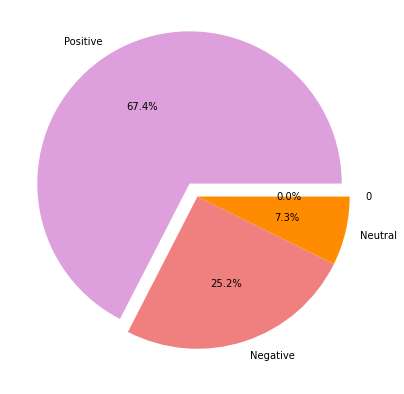

In [39]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0, 0), autopct='%1.1f%%', shadow=False, colors=['plum', 'lightcoral', 'darkorange', 'skyblue'])

In [40]:
fin_data[fin_data['Analysis']=='Negative']['Review Text'][84]

'I received this shirt in my typical xs and it fits perfectly. i?m not crazy in love with it but i also don?t dislike. the shirt is on the thin side. do i need to wear a cami underneath it, no. my concern is holes. it does remind me of a material that could develop some holes after some wear and washes. with that being said i?ll wash this shirt in cold water and hang dry and hopefully that will prevent holes from developing. the length is fine and i do like the slits in front?it adds a little dim'

In [41]:
fin_data['Rating']=df1['Rating']

In [42]:
fin_data[fin_data['Vader Analysis']=='Positive']['Rating'].value_counts()

5    12078
4     4524
3     2308
2     1127
1      479
Name: Rating, dtype: int64

In [43]:
fin_data[fin_data['SWN analysis']=='Negative']['Rating'].value_counts()

5    2696
4    1392
3     897
2     569
1     373
Name: Rating, dtype: int64

In [44]:
fin_data[fin_data['Analysis']=='Positive']['Rating'].value_counts()

5    12254
4     4621
3     2494
2     1250
1      587
Name: Rating, dtype: int64

In [52]:
df

,Review Text,Rating,Class Name,Age,n_words
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,8
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,67
2,I had such high hopes for this dress and reall...,3,Dresses,60,98
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,22
4,This shirt is very flattering to all due to th...,5,Blouses,47,36
...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,Dresses,34,28
23482,"It reminds me of maternity clothes. soft, stre...",3,Knits,48,37
23483,"This fit well, but the top was very see throug...",3,Dresses,31,42
23484,I bought this dress for a wedding i have this ...,3,Dresses,28,86


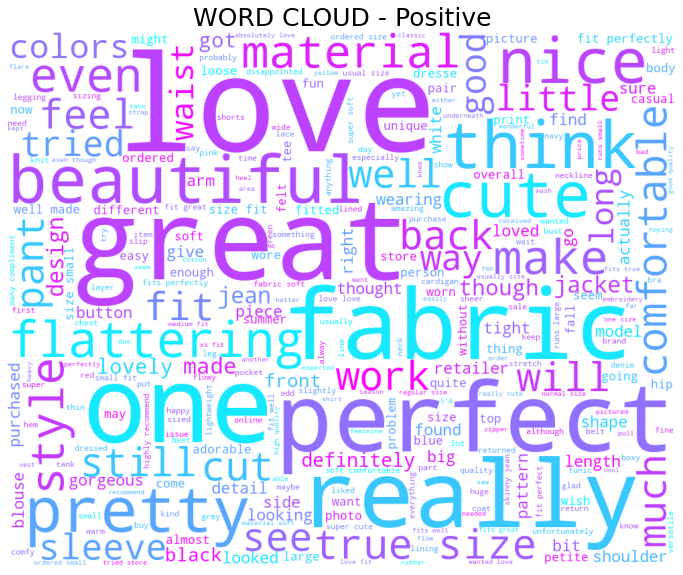

In [58]:
#Nubes de Palabras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
newStopWords = ['dress', "top", "shirt", 'skirt', 'nan', 'short', 'sweater','pant', 'bought', 'bottom', 'look','looks', 'color','wear']
stopwords.update(newStopWords)
Pos= (fin_data['Analysis']== 'Positive')
df_pos= fin_data[Pos]
wordcloud = WordCloud(
    background_color='White',
    colormap= "cool",
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_pos['Review Text'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Positive",fontsize=25)
plt.axis('off')
plt.show()

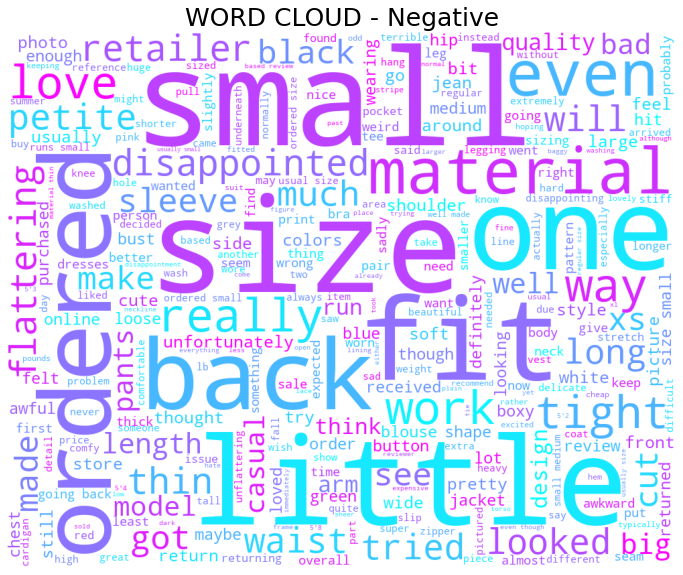

In [60]:
Neg= (fin_data['Analysis']== 'Negative' )
df_Neg= fin_data[Neg]
newStopWords = ['dress', "top", "shirt", 'skirt', 'nan', 'fabric']
stopwords.update(newStopWords)
wordcloud = WordCloud(
    background_color='white',
    colormap= "cool",
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_Neg['Review Text'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Negative",fontsize=25)
plt.axis('off')
plt.show()

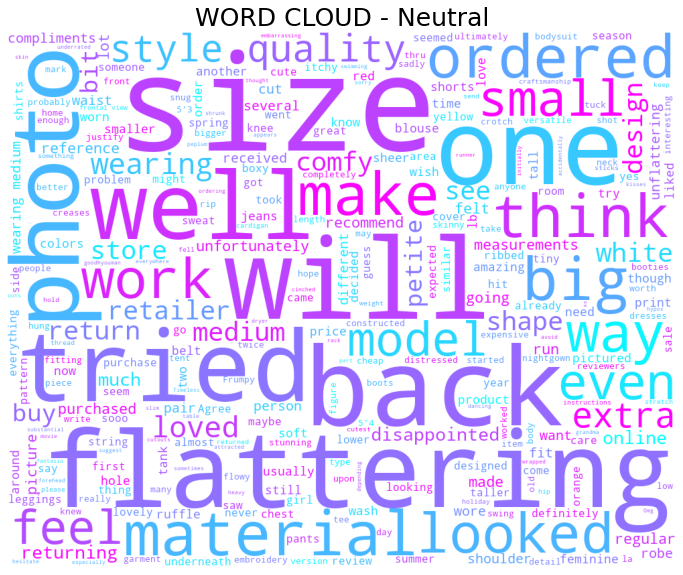

In [61]:
Neu= (fin_data['Analysis']== 'Neutral' )
newStopWords = ['dress', "top", "shirt", 'skirt', 'nan', 'short', 'sweater','pant', 'bought', 'bottom', 'look','looks', 'color','wear']
stopwords.update(newStopWords)
df_Neu= fin_data[Neu]
wordcloud = WordCloud(
    background_color='White',
    colormap= "cool",
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_Neu['Review Text'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Neutral",fontsize=25)
plt.axis('off')
plt.show()

In [62]:
#obtener matriz de frecuencias
count_vector = CountVectorizer()
count_vector.fit(fin_data['Lemma'])
names = count_vector.get_feature_names()

doc_array = count_vector.transform(fin_data['Lemma']).toarray()
doc_array
#Matriz de Frecuencias
frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix

,aa,aaaaaaamazing,aaaaandidon,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,...,zipper,zippered,zippie,zipping,zips,zombie,zone,zoolander,zoom,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
x_train, x_test, y_train, y_test = train_test_split(fin_data['Lemma'], fin_data['Analysis'], random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

training_data = count_vector.fit_transform(x_train)
testing_data = count_vector.transform(x_test)

#Utilizando Maquina de vectores de soporte
clf = SVC(decision_function_shape='ovo', kernel='linear')
clf.fit(training_data, y_train)

y_pred = clf.predict(testing_data)

Number of rows in the total set: 23486
Number of rows in the training set: 17614
Number of rows in the test set: 5872


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
from sklearn.metrics import plot_confusion_matrix

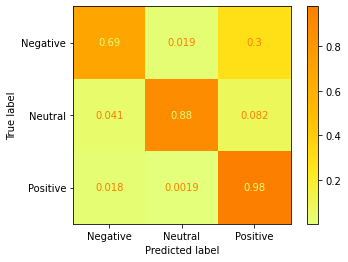

In [ ]:
plot_confusion_matrix(clf, testing_data, y_test, normalize='true', cmap='Wistia')
plt.show()

In [ ]:
print("classification report:")
print(classification_report(y_test, y_pred, target_names=['Neutral','Negative','Positive']))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred, normalize='true'))

classification report:
              precision    recall  f1-score   support

     Neutral       0.68      0.69      0.68       322
    Negative       0.93      0.88      0.90       243
    Positive       0.98      0.98      0.98      5307

    accuracy                           0.96      5872
   macro avg       0.86      0.85      0.86      5872
weighted avg       0.96      0.96      0.96      5872

confusion matrix:
[[0.6863354  0.01863354 0.29503106]
 [0.04115226 0.87654321 0.08230453]
 [0.01752402 0.0018843  0.98059167]]


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
pd.DataFrame(report).transpose().to_csv('test_svc.csv')

In [ ]:
y_train_pred = clf.predict(training_data)

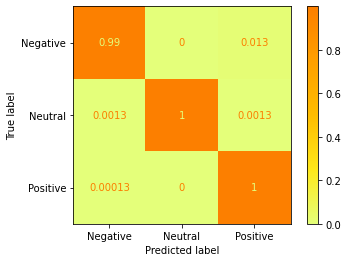

In [ ]:
plot_confusion_matrix(clf, training_data, y_train, normalize='true', cmap='Wistia')
plt.show()

In [ ]:
print("classification report:")
print(classification_report(y_train, y_train_pred, target_names=['Neutral','Negative','Positive']))
print("confusion matrix:")
print(np.round(confusion_matrix(y_train, y_train_pred, normalize='true'),3))

classification report:
              precision    recall  f1-score   support

     Neutral       1.00      0.99      0.99       972
    Negative       1.00      1.00      1.00       743
    Positive       1.00      1.00      1.00     15899

    accuracy                           1.00     17614
   macro avg       1.00      0.99      1.00     17614
weighted avg       1.00      1.00      1.00     17614

confusion matrix:
[[0.987 0.    0.013]
 [0.001 0.997 0.001]
 [0.    0.    1.   ]]


In [ ]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB

In [ ]:
#Utilizando NaiveBayes
clf2 = MultinomialNB()
clf2.fit(training_data, y_train)

y_pred2 = clf2.predict(testing_data)

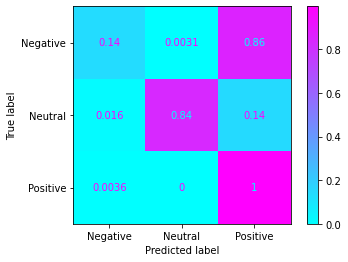

In [ ]:
plot_confusion_matrix(clf2, testing_data, y_test, normalize='true', cmap='cool')
plt.show()

In [ ]:
print("classification report:")
print(classification_report(y_test, y_pred2, target_names=['Neutral','Negative','Positive']))
print("confusion matrix:")
print(np.round(confusion_matrix(y_test, y_pred2, normalize='true'),2))

classification report:
              precision    recall  f1-score   support

     Neutral       0.66      0.14      0.23       322
    Negative       1.00      0.84      0.91       243
    Positive       0.94      1.00      0.97      5307

    accuracy                           0.94      5872
   macro avg       0.87      0.66      0.70      5872
weighted avg       0.93      0.94      0.93      5872

confusion matrix:
[[0.14 0.   0.86]
 [0.02 0.84 0.14]
 [0.   0.   1.  ]]


In [ ]:
y_train_pred2 = clf2.predict(training_data)

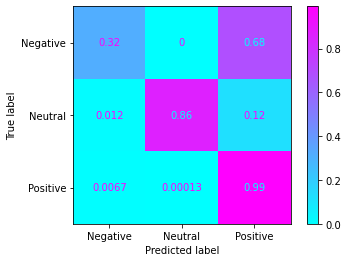

In [ ]:
plot_confusion_matrix(clf2, training_data, y_train, normalize='true', cmap='cool')
plt.show()

In [ ]:
print("classification report:")
print(classification_report(y_train, y_train_pred2, target_names=['Neutral','Negative','Positive']))
print("confusion matrix:")
print(np.round(confusion_matrix(y_train, y_train_pred2, normalize='true'),3))

classification report:
              precision    recall  f1-score   support

     Neutral       0.73      0.32      0.44       972
    Negative       1.00      0.86      0.93       743
    Positive       0.95      0.99      0.97     15899

    accuracy                           0.95     17614
   macro avg       0.89      0.72      0.78     17614
weighted avg       0.94      0.95      0.94     17614

confusion matrix:
[[0.316 0.    0.684]
 [0.012 0.864 0.124]
 [0.007 0.    0.993]]
